## ## Multi-Class Classification Task: Keras and Scikit-Learn ,random forest

In classification process ROC,AUC and TSS is used but not for regression 

In [84]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve,confusion_matrix

In [100]:
# load the iris dataset
iris = load_iris()

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# create a random forest classification model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# train the model on the training data
rf.fit(X_train, y_train)

# make predictions on the testing data
y_pred = rf.predict(X_test)

# evaluate the model performance using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


In [101]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

#Roc and TSS

In [ ]:
roc_auc

In [125]:
# Compute the predicted probabilities for each class
y_score = rf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = roc_auc_score(y_test == i, y_score[:, i])
# Compute TSS and AUC
#tss = np.mean([tpr[i]-fpr[i] for i in range(3)])
auc = np.mean([roc_auc[i] for i in range(3)])

# Print the results
print("ROC AUC: ", auc)
#print("TSS: ", tss)

ROC AUC:  1.0


In [103]:
# # Predict probabilities for test set for two classes
# y_prob = rf.predict_proba(X_test)[:, 1]
# #TSS

# tn, fp, fn, tp = confusion_matrix(y_test, y_pred)

# # Compute TSS
# tss = tp / (tp + fn) - fp / (fp + tn)

# # Compute AUC
# auc = roc_auc_score(y_test, y_prob)
# # Compute ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, y_prob)

In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import pandas as pd

# load the data
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';')

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('quality', axis=1), data['quality'], test_size=0.2, random_state=42)

# create a random forest regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# train the model on the training data
rf.fit(X_train, y_train)

# make predictions on the testing data
y_pred = rf.predict(X_test)

# evaluate the model performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
# Compute R2
r2 = r2_score(y_test, y_pred)
print('R Squared Error:', r2)

Mean Squared Error: 0.30123812499999997
R Squared Error: 0.5390429623873638


In [52]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## Random forest regression does not have coefficients like linear regression because it is an ensemble of decision trees rather than a linear model

In [49]:
# get the feature importances
importances = rf.feature_importances_

# print the importance scores for each feature
for feature, importance in zip(data.columns, importances):
    print(feature,":" ,round(importance*100,2))

fixed acidity : 5.32
volatile acidity : 11.15
citric acid : 5.08
residual sugar : 5.79
chlorides : 7.11
free sulfur dioxide : 4.72
total sulfur dioxide : 7.68
density : 5.08
pH : 6.14
sulphates : 14.84
alcohol : 27.09


## Multi-input multi-output (MIMO) random forest regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# generate some sample data
X1 = np.random.rand(100, 3)
X2 = np.random.rand(100, 2)
X = np.hstack((X1, X2))
y1 = np.random.rand(100, 1)
y2 = np.random.rand(100, 1)
y = np.hstack((y1, y2))

# create a MIMO random forest regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# train the model on the data
rf.fit(X, y)

# predict on new data
X_new1 = np.random.rand(10, 3)
X_new2 = np.random.rand(10, 2)
X_new = np.hstack((X_new1, X_new2))
y_pred = rf.predict(X_new)

print('Predicted output:', y_pred)


In [ ]:
# calculate the feature importance for each output target
importance1 = rf.feature_importances_[:3]
importance2 = rf.feature_importances_[3:]

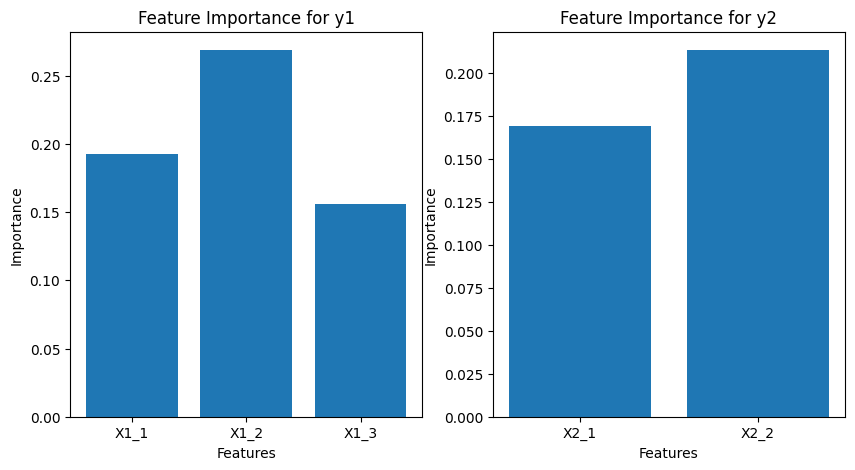

In [60]:
## plotting the features 
# plot the feature importance for each output target
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].bar(range(3), importance1)
ax[0].set_xticks(range(3))
ax[0].set_xticklabels(['X1_1', 'X1_2', 'X1_3'])
ax[0].set_xlabel('Features')
ax[0].set_ylabel('Importance')
ax[0].set_title('Feature Importance for y1')
ax[1].bar(range(2), importance2)
ax[1].set_xticks(range(2))
ax[1].set_xticklabels(['X2_1', 'X2_2'])
ax[1].set_xlabel('Features')
ax[1].set_ylabel('Importance')
ax[1].set_title('Feature Importance for y2')
plt.show()